## Churn Modelling

## Content

This project data set contains details of a bank's customers and the target variable is a binary variable which is reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer. So here I am going to build a model that will determine if a customer will continue with bank or not.

In [714]:
# import necessary libraries
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading and Reading Data

In [715]:
df = pd.read_csv('Churn_Modelling.csv')
display(df.head())
print()
display(df.info())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


None

### Data-Cleaning: Cleaning strings in column

In [716]:
# convert all columns to lower
df.columns = df.columns.str.lower()
df.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [717]:
# change all "string" data to lowercase
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_columns:
    df[col] = df[col].str.lower()

## EDA 

The first thing I want to do here is look at the data. Identify numerical and categorical variables.
See if there is a need to clean the headers and data in a way preferred for formating and processing.  

In [718]:
df.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,hargrave,619,france,female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,hill,608,spain,female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,onio,502,france,female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,boni,699,france,female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,mitchell,850,spain,female,43,2,125510.82,1,1,1,79084.10,0


In [719]:
df.shape

(10000, 14)

Here, just taking a peek at the data, I can see that the headers are capitalized, the **'RowNumber' and 'CustomerId'** column is not needed since pandas gives me a good indexing system already. And just as a peek, without further exploring, I see that the data is freshly & nicely prepared as the numerical and categorical data have been separated quite nicely.

Okay now, I'll dive deeper into the data to discover the information about this data. 

In [720]:
df.isnull().sum()

rownumber          0
customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

In [721]:
df.describe()

,rownumber,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [722]:
# look at the data again
df.head(10)

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,hargrave,619,france,female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,hill,608,spain,female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,onio,502,france,female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,boni,699,france,female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,mitchell,850,spain,female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,chu,645,spain,male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,bartlett,822,france,male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,obinna,376,germany,female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,he,501,france,male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,h?,684,france,male,27,2,134603.88,1,1,1,71725.73,0


Percentage of "being churn": % 20.37 --> (2037 churn cases out of 10000)
Percentage of "NOT being churn": % 79.63 --> (7963 NOT churn cases out of 10000)


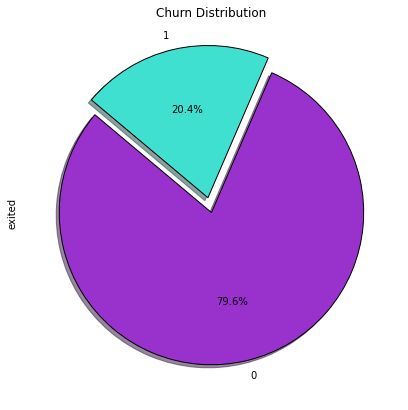

In [723]:
# Let's take a quick look at Target variable
y = df['exited']

print(f'Percentage of \033[1m"being churn"\033[0m: % {round(y.value_counts(normalize=True)[1]*100,2)} --> \
({y.value_counts()[1]} churn cases out of {len(df)})\nPercentage of \033[1m"NOT being churn"\033[0m: % {round(y.value_counts(normalize=True)[0]*100,2)} --> ({y.value_counts()[0]} NOT churn cases out of {len(df)})')

explode = [0, 0.1]

df["exited"].value_counts().plot(kind="pie", 
                                 autopct='%1.1f%%', 
                                 figsize=(7, 7), 
                                 explode=explode, 
                                 wedgeprops={'edgecolor': 'black'}, 
                                 shadow=True, 
                                 colors = ['darkorchid', 'turquoise'], 
                                 startangle=140)
plt.title('Churn Distribution');

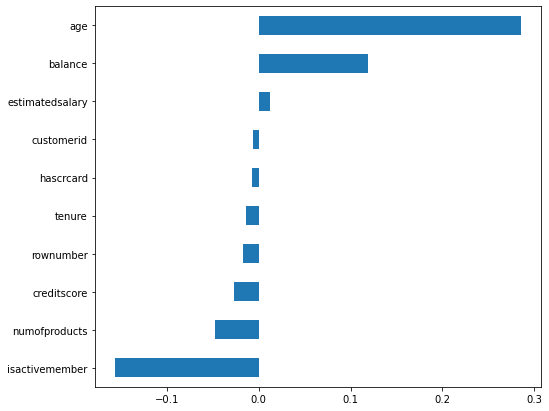

In [724]:
plt.figure(figsize = (8, 7))
df.corr()['exited'].sort_values().drop("exited").plot(kind = "barh");

No much correlation of numerical features and target variable

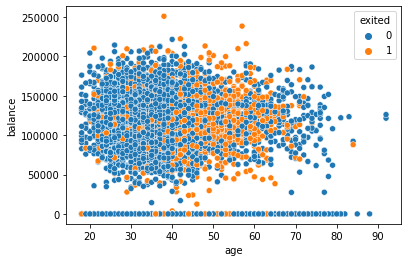

In [725]:
sns.scatterplot(data=df, x="age", y="balance", hue="exited");

In [726]:
df.head(3)

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,hargrave,619,france,female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,hill,608,spain,female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,onio,502,france,female,42,8,159660.80,3,1,0,113931.57,1


In [727]:
del df['rownumber']
del df['customerid']
del df['surname']

In [728]:
# has credit cards encoding
hascrcard_values = {
    1: 'yes',
    0: 'no'
}

df.hascrcard = df.hascrcard.map(hascrcard_values)

# is an active member
isactivemember_values = {
    1: 'yes',
    0: 'no'
}
df.isactivemember = df.isactivemember.map(isactivemember_values)

In [729]:
df.head(3)

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,france,female,42,2,0.00,1,yes,yes,101348.88,1
1,608,spain,female,41,1,83807.86,1,no,yes,112542.58,0
2,502,france,female,42,8,159660.80,3,yes,no,113931.57,1


In [730]:
# split the categorical and numerical columns
# categorical = []
categorical =list(df.select_dtypes('object').columns)
numerical = list(df.drop(['exited'], axis=1).select_dtypes('number').columns)
# numerical = ['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'estimatedsalary']

In [731]:
print('Numerical: ', numerical)
print('Categorical: ', categorical)

Numerical:  ['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'estimatedsalary']
Categorical:  ['geography', 'gender', 'hascrcard', 'isactivemember']


In [732]:
df[numerical + categorical].describe().T

,count,mean,std,min,25%,50%,75%,max
creditscore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
numofproducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
estimatedsalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


C:\Users\USER\anaconda3\envs\keras_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\envs\keras_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


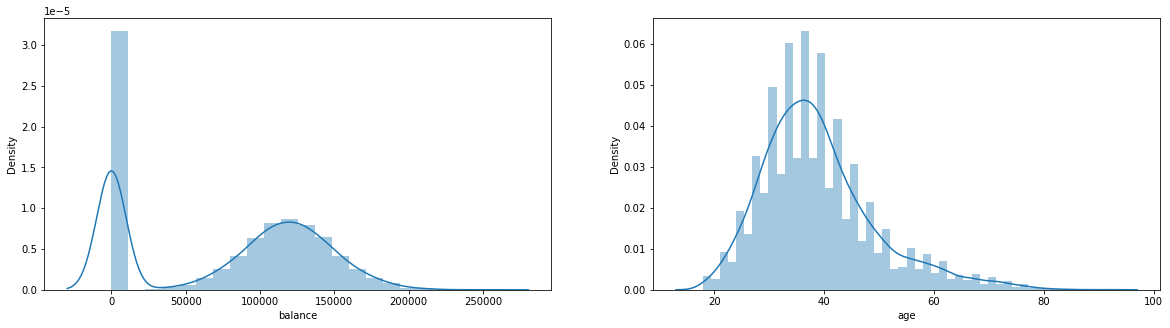

In [733]:
plt.subplots(figsize=(20,5))
plt.subplot(121)
sns.distplot(df['balance'])

plt.subplot(122)
sns.distplot(df['age'])

plt.show();

In [734]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:7]) # looks for all unique values
    print(df[col].nunique())
    print()

creditscore
[619 608 502 699 850 645 822]
460

geography
['france' 'spain' 'germany']
3

gender
['female' 'male']
2

age
[42 41 39 43 44 50 29]
70

tenure
[2 1 8 7 4 6 3]
11

balance
[     0.    83807.86 159660.8  125510.82 113755.78 115046.74 142051.07]
6382

numofproducts
[1 3 2 4]
4

hascrcard
['yes' 'no']
2

isactivemember
['yes' 'no']
2

estimatedsalary
[101348.88 112542.58 113931.57  93826.63  79084.1  149756.71  10062.8 ]
9999

exited
[1 0]
2



From the above, it seems this there is no null value and all categorical variables are properly encoded. 

Next, look at the **relations** in our numerical data

In [735]:
categorical 

['geography', 'gender', 'hascrcard', 'isactivemember']

In [736]:
df[numerical].corr() # the correlation matrix

,creditscore,age,tenure,balance,numofproducts,estimatedsalary
creditscore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.001384
age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.007201
tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.007784
balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,0.012797
numofproducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.014204
estimatedsalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,1.000000


Does not say much

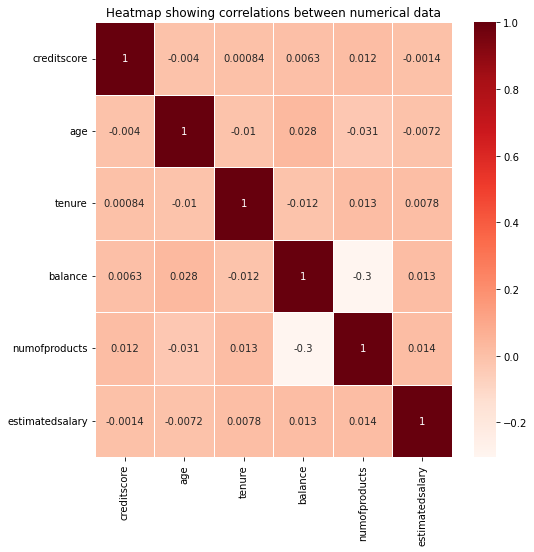

In [737]:
plt.figure(figsize=(8,8))  
sns.heatmap(df[numerical].corr(),annot=True,linewidths=.5, cmap="Reds")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

minimal relation of numerical features with target variable 

In [738]:
df[numerical].corr().unstack().sort_values(ascending = False)

creditscore      creditscore        1.000000
age              age                1.000000
numofproducts    numofproducts      1.000000
balance          balance            1.000000
tenure           tenure             1.000000
estimatedsalary  estimatedsalary    1.000000
balance          age                0.028308
age              balance            0.028308
estimatedsalary  numofproducts      0.014204
numofproducts    estimatedsalary    0.014204
                 tenure             0.013444
tenure           numofproducts      0.013444
estimatedsalary  balance            0.012797
balance          estimatedsalary    0.012797
creditscore      numofproducts      0.012238
numofproducts    creditscore        0.012238
estimatedsalary  tenure             0.007784
tenure           estimatedsalary    0.007784
creditscore      balance            0.006268
balance          creditscore        0.006268
creditscore      tenure             0.000842
tenure           creditscore        0.000842
creditscor

From here I can see there is low corelation amongst the numeric data. So the best way I can determine if a feature is important is excuse it from the training dataset and see how it affects it.

In [739]:
# sns.pairplot(df, hue="exited", palette="inferno", corner=True);

### Data separation  - Setting up the validation framework

I am gonna split it into three datasets (train, val, and test) - training, validation and test datasets
I will use scikit-learn for this step

In [740]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import mutual_info_score
from sklearn.metrics import accuracy_score

In [741]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=43)

In [742]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=43)

In [743]:
# sanity check
(len(df_train) / len(df)), (len(df_val) / len(df)), (len(df_val) / len(df))

(0.6, 0.2, 0.2)

In [744]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [745]:
df.head() # index reset

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,france,female,42,2,0.00,1,yes,yes,101348.88,1
1,608,spain,female,41,1,83807.86,1,no,yes,112542.58,0
2,502,france,female,42,8,159660.80,3,yes,no,113931.57,1
3,699,france,female,39,1,0.00,2,no,no,93826.63,0
4,850,spain,female,43,2,125510.82,1,yes,yes,79084.10,0


In [746]:
y_train = df_train.exited.values
y_val = df_val.exited.values
y_test = df_test.exited.values

In [747]:
# drop target column
df_train = df_train.drop('exited', axis=1)
df_val = df_val.drop('exited', axis=1)
df_test = df_test.drop('exited', axis=1)

In [748]:
df_train.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary
0,604,france,male,36,6,116229.85,2,yes,yes,79633.38
1,542,spain,male,34,8,108653.93,1,no,yes,144725.14
2,701,france,male,44,7,0.00,2,yes,no,23425.78
3,521,germany,female,29,2,87212.80,1,yes,yes,994.86
4,728,france,male,30,10,114835.43,1,no,yes,37662.49


I still want to know what variables are important.
**ROC AUC** could also be used to evaluate feature importance of numerical variables.

In [749]:
numerical

['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'estimatedsalary']

In [750]:
for c in numerical:
    auc = roc_auc_score(y_train, df_train[c])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[c])
    print('%15s, %.3f' % (c, auc))

    creditscore, 0.520
            age, 0.733
         tenure, 0.509
        balance, 0.570
  numofproducts, 0.580
estimatedsalary, 0.506


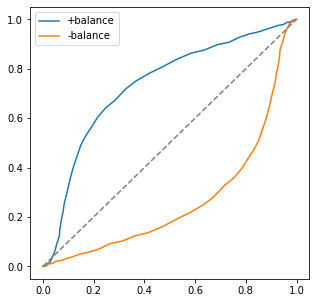

In [751]:
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_train, df_train.age)
plt.plot(fpr, tpr, label='+balance')

fpr, tpr, _ = roc_curve(y_train, -df_train.age)
plt.plot(fpr, tpr, label='-balance')

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')

plt.legend()
plt.show()

There's separation in distribution of age between positive and negative classes. Does it mean age is important here? 

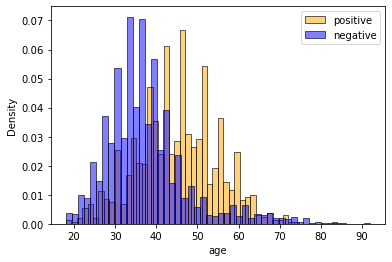

In [752]:
sns.histplot(df_train.age[y_train == 1],
             stat='density', bins=50,
             color='orange', alpha=0.5,
             label='positive')
sns.histplot(df_train.age[y_train == 0],
             stat='density', bins=50,
             color='blue', alpha=0.5,
             label='negative')

plt.legend()
plt.show()

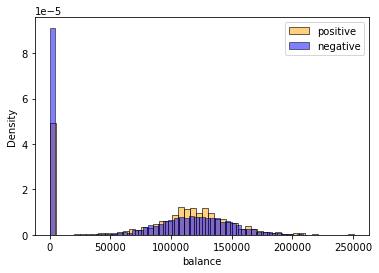

In [753]:
sns.histplot(df_train.balance[y_train == 1],
             stat='density', bins=50,
             color='orange', alpha=0.5,
             label='positive')
sns.histplot(df_train.balance[y_train == 0],
             stat='density', bins=50,
             color='blue', alpha=0.5,
             label='negative')

plt.legend()
plt.show()

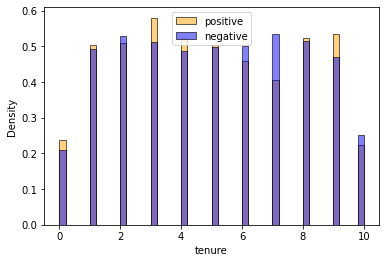

In [754]:
sns.histplot(df_train.tenure[y_train == 1],
             stat='density', bins=50,
             color='orange', alpha=0.5,
             label='positive')
sns.histplot(df_train.tenure[y_train == 0],
             stat='density', bins=50,
             color='blue', alpha=0.5,
             label='negative')

plt.legend()
plt.show()

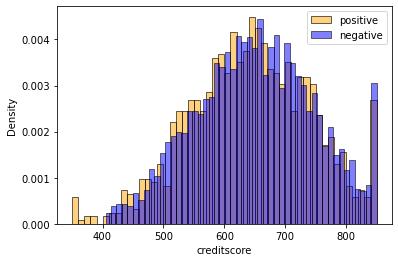

In [755]:
sns.histplot(df_train.creditscore[y_train == 1],
             stat='density', bins=50,
             color='orange', alpha=0.5,
             label='positive')
sns.histplot(df_train.creditscore[y_train == 0],
             stat='density', bins=50,
             color='blue', alpha=0.5,
             label='negative')

plt.legend()
plt.show()

After some help collected by good friends of the datatalkclub, I was told to get the correlation between features and the target for feature importance in relation to target variable. " Because correlation between features and themselves tells us if there is reduntant information in the set (which helps us to keep/eliminate features, but it doesn't clearly tells us the relationship feature and target)" - Kattson Bastos Advice

In [756]:
df_full_train[numerical].corrwith(df_full_train.exited).abs().sort_values(ascending = False)

age                0.285646
balance            0.113100
numofproducts      0.044804
creditscore        0.025264
tenure             0.019579
estimatedsalary    0.005647
dtype: float64

Hence from above, it is seen what numerical variables are really affecting the target variables


Now, I will look at the feature importance for the categorical variables

In [757]:
# determine the feature importance for the categorical variables
# use the mutual_info_score to determine the relation of 
# one categorical variable to the target variable

def mutual_info_exited_score(series):
    return mutual_info_score(series, df_full_train.exited)

In [758]:
categorical

['geography', 'gender', 'hascrcard', 'isactivemember']

In [759]:
df_full_train

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
6100,796,france,male,30,2,137262.71,2,yes,no,62905.29,0
4860,748,spain,male,36,4,141573.55,1,yes,no,82158.14,0
4401,845,spain,female,38,2,112803.92,1,yes,no,179631.85,0
1416,585,spain,female,33,8,0.00,2,yes,no,114182.07,0
8620,768,france,female,40,8,0.00,2,no,yes,69080.46,0
...,...,...,...,...,...,...,...,...,...,...,...
8499,498,germany,male,35,2,121968.11,2,no,yes,188343.05,0
2064,765,france,male,44,6,0.00,2,yes,yes,159899.97,0
7985,696,germany,female,27,2,96129.32,2,yes,yes,5983.70,0
2303,714,spain,male,45,0,124693.48,1,no,yes,187194.15,0


In [760]:
mutual_info = df_full_train[categorical].apply(mutual_info_exited_score)
mutual_info.sort_values(ascending=False)

isactivemember    0.014091
geography         0.012912
gender            0.006405
hascrcard         0.000032
dtype: float64

The categorical feature importance

Now, we train our model with the information we know.
We build our first model

In [761]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [762]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [763]:
model = LogisticRegression(solver='liblinear', penalty='l2')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

Now, to test model **one**

In [764]:
dict(zip(dv.get_feature_names_out(), model.coef_[0]))

{'age': 0.04477071578233233,
 'balance': 3.154761594349631e-06,
 'creditscore': -0.005014792377389181,
 'estimatedsalary': -1.5986656350423042e-06,
 'gender=female': 0.0013453554677235787,
 'gender=male': -0.001710808876885251,
 'geography=france': -0.0010627591209487386,
 'geography=germany': 0.0013176869257597054,
 'geography=spain': -0.0006203812139726306,
 'hascrcard=no': -7.367462855608813e-05,
 'hascrcard=yes': -0.00029177878060557445,
 'isactivemember=no': 0.0019172458242749735,
 'isactivemember=yes': -0.0022826992334366446,
 'numofproducts': -0.0008480016190156052,
 'tenure': -0.0025240875067798446}

In [765]:
test_dict = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(test_dict)

In [766]:
y_pred = model.predict_proba(X_test)[:, 1]

In [767]:
exited = (y_pred >= 0.5)
exited

array([False, False,  True, ..., False, False, False])

In [768]:
accuracy_score(y_val, y_pred >= 0.5).round(3)

0.785

On the first model, we have a 77% accuracy but now let's calculate the precision & recall or the model

In [769]:
# how many people actually did not exit the bank
1- y_val.mean() 

0.7995

79% of people did not exit the bank

Let's find a good threshold 

In [770]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    default = (y_pred >= t)
    score = (default == y_val).mean()
    scores.append(score)
    print('%.2f, %.3f' % (t, score))

0.00, 0.201
0.05, 0.205
0.10, 0.294
0.15, 0.443
0.20, 0.562
0.25, 0.646
0.30, 0.705
0.35, 0.740
0.40, 0.756
0.45, 0.771
0.50, 0.785
0.55, 0.791
0.60, 0.794
0.65, 0.796
0.70, 0.798
0.75, 0.799
0.80, 0.799
0.85, 0.799
0.90, 0.799
0.95, 0.799
1.00, 0.799


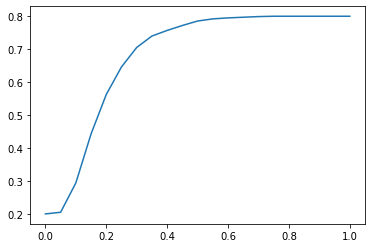

In [771]:
plt.plot(thresholds, scores)

We creat a confusion matrix that will help us find precision(p) and recall(r)

In [772]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [773]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [774]:
# tp - true positive, tn - true negative, fp - false positive, fn - false negative.
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [775]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[1561,   38],
       [ 392,    9]])

In [776]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.78, 0.02],
       [0.2 , 0.  ]])

In [777]:
p = tp / (tp + fp)
p

0.19148936170212766

In [778]:
r = tp / (tp + fn)
r


0.022443890274314215

Now let's plot the roc curve to see the performace of this model

In [779]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

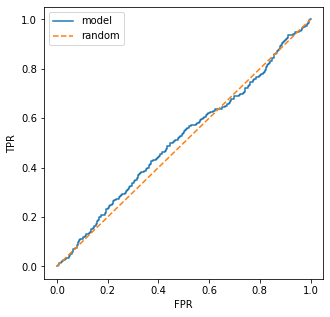

In [780]:
plt.figure(figsize=(5,5))

plt.plot(fpr, tpr, label='model')
plt.plot([0,1], [0,1], label='random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

So far, it is shown that our model is bad. 

In [781]:
from sklearn.metrics import auc

auc(fpr, tpr)

0.5136049806690279

In [782]:
roc_auc_score(y_val, y_pred)

0.5136049806690279

I have tried removing features from the dataset, and what I noticed is that this dataset needs more features. As I removed features, the auc reduced but with more features the model increased

Buidling a **decision tree** to see if the model can improve

In [783]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [784]:
train_dicts = df_train.to_dict(orient='records')

In [785]:
train_dicts[900]

{'creditscore': 673,
 'geography': 'germany',
 'gender': 'male',
 'age': 36,
 'tenure': 5,
 'balance': 73088.06,
 'numofproducts': 2,
 'hascrcard': 'no',
 'isactivemember': 'no',
 'estimatedsalary': 196142.26}

In [786]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [787]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [788]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [789]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.6874199741421929

A higher auc score here from the basic **DecisionTreeClassifier** compared to the **LogisticRegression**

In [790]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

We can see that the model is **over-fitting** here. It has an auc score of **1.0** on the **training set** but a significantly lower score on the **validation-set**

One reason here, is that the model learning to deep so it memorizies all outcomes in the training-set and poorly in the validation.

In [791]:
# restrict depth search
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [792]:
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.7968065750867629
val: 0.8023265788000293


In [793]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- age <= 42.50
|   |--- numofproducts <= 2.50
|   |   |--- numofproducts <= 1.50
|   |   |   |--- class: 0
|   |   |--- numofproducts >  1.50
|   |   |   |--- class: 0
|   |--- numofproducts >  2.50
|   |   |--- balance <= 55948.91
|   |   |   |--- class: 0
|   |   |--- balance >  55948.91
|   |   |   |--- class: 1
|--- age >  42.50
|   |--- isactivemember=yes <= 0.50
|   |   |--- age <= 50.50
|   |   |   |--- class: 0
|   |   |--- age >  50.50
|   |   |   |--- class: 1
|   |--- isactivemember=yes >  0.50
|   |   |--- numofproducts <= 2.50
|   |   |   |--- class: 0
|   |   |--- numofproducts >  2.50
|   |   |   |--- class: 1



C:\Users\USER\anaconda3\envs\keras_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


now let's try for different depth parameters.

In [794]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.685
   2 -> 0.743
   3 -> 0.802
   4 -> 0.819
   5 -> 0.843
   6 -> 0.848
  10 -> 0.778
  15 -> 0.700
  20 -> 0.680
None -> 0.689


Best **max_depth = 5**

In [795]:
scores = []

for depth in [4, 5, 6]:
    for sample in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=sample)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, sample, auc))

In [796]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [797]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.819  0.843  0.845
5                 0.819  0.845  0.850
10                0.825  0.847  0.851
15                0.824  0.847  0.847
20                0.825  0.849  0.848
100               0.791  0.790  0.796
200               0.775  0.775  0.775
500               0.757  0.757  0.757

<AxesSubplot:xlabel='None-max_depth', ylabel='min_samples_leaf'>

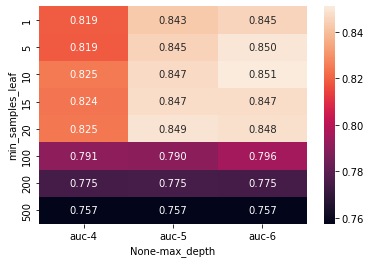

In [798]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f", color='red')

We can see that a **max_depth=6** and **min_samples_leaf=10** are the best parameters

In [799]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=10)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=10)

In [800]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- age <= 42.50
|   |--- numofproducts <= 2.50
|   |   |--- numofproducts <= 1.50
|   |   |   |--- geography=germany <= 0.50
|   |   |   |   |--- balance <= 80289.48
|   |   |   |   |   |--- age <= 37.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- age >  37.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- balance >  80289.48
|   |   |   |   |   |--- age <= 38.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- age >  38.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- geography=germany >  0.50
|   |   |   |   |--- balance <= 97709.64
|   |   |   |   |   |--- balance <= 77121.73
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- balance >  77121.73
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- balance >  97709.64
|   |   |   |   |   |--- age <= 38.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- age >  38.50
|   |   |   |   |   |   |--- class: 0
|   |   |--- numofproducts >  1.50
|   |   |

C:\Users\USER\anaconda3\envs\keras_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


From above we can see that the the decision tree has an auc of 85.1% which is better than the 51% by the logistic regression model

In [801]:
y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

val: 0.8508637724013918


In [802]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

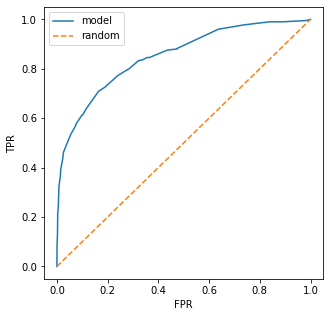

In [803]:
plt.figure(figsize=(5,5))

plt.plot(fpr, tpr, label='model')
plt.plot([0,1], [0,1], label='random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

Significantly better.

### Random Forests & Ensembles

In [804]:
from sklearn.ensemble import RandomForestClassifier

In [805]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=43)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

In [806]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

In [807]:
df_scores

,n_estimators,auc
0,10,0.802486
1,20,0.822447
2,30,0.826615
3,40,0.831803
4,50,0.834809
5,60,0.839074
6,70,0.840231
7,80,0.840760
8,90,0.841888
9,100,0.843120


from here we can see that the best **no. of estimators is 190**

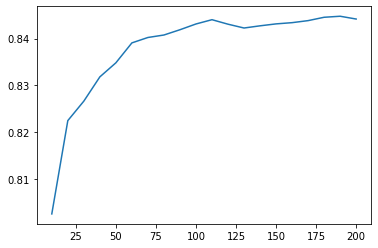

In [808]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [809]:
scores = []

# max-depths
for d in [5, 10, 15]:
    # no of estimators - no of trees
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=43)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [810]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

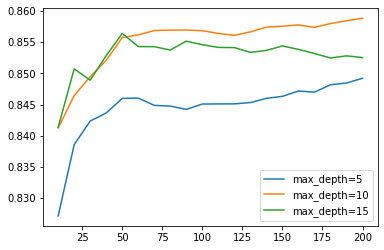

In [811]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

Hence the best value for **max_depth** is 10

In [812]:
max_depth = 10

In [813]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=43)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [814]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

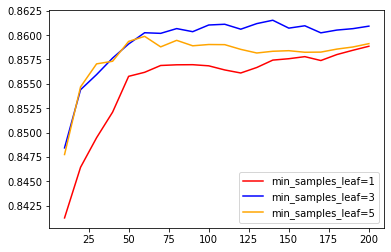

In [815]:
# colors = ['black', 'blue', 'orange', 'red', 'grey']
colors = ['red', 'blue', 'orange']

# values = [1, 3, 5, 10, 50]
values = [1, 3, 5]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [816]:
min_samples_leaf = 1

Now, we train the final random forest model

In [817]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=43)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=43)

In [818]:
y_pred = rf.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

val: 0.858858170396398


The auc is just slightly better by **0.7%** compared with DecisionTrees

### Gradient boosting and XGBoost

Here we gonna use another model called **XGBoost** to experiment with before we select the best model to go with

In [819]:
import xgboost as xgb

In [820]:
# we have to convert it to a form that can be processed by xgBoost
features = dv.get_feature_names_out()
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [821]:
features

array(['age', 'balance', 'creditscore', 'estimatedsalary',
       'gender=female', 'gender=male', 'geography=france',
       'geography=germany', 'geography=spain', 'hascrcard=no',
       'hascrcard=yes', 'isactivemember=no', 'isactivemember=yes',
       'numofproducts', 'tenure'], dtype=object)

In [822]:
# basic parameters for an xgBoost model
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [823]:
y_pred = model.predict(dval)

In [824]:
roc_auc_score(y_val, y_pred)

0.8585758867371909

In [825]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [826]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [827]:
s = output.stdout

In [828]:
print(s[:200])

[0]	train-auc:0.86270	val-auc:0.84610
[5]	train-auc:0.89757	val-auc:0.85690
[10]	train-auc:0.91897	val-auc:0.86103
[15]	train-auc:0.93145	val-auc:0.86358
[20]	train-auc:0.93788	val-auc:0.86473
[25]	tr


It is doing quite well. a little bit of overfitting as the list grows

In [829]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [830]:
df_score = parse_xgb_output(output)

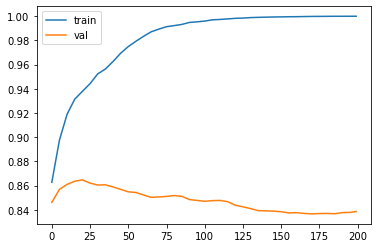

In [831]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

It is over-fitting as we can see. As it grows it learns the training set well but it is quite bad at predicting a new dataset

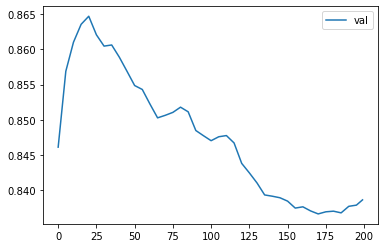

In [832]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

#### So we tune the parameters of the xgBoost model

In [837]:
scores = {}

We tune **eta(learning rate)**

In [846]:
%%capture output

xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [847]:
key = 'eta={}'.format(xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.01'

In [848]:
scores.keys()

dict_keys(['eta=1.0', 'eta=0.3', 'eta=0.1', 'eta=0.05', 'eta=0.01'])

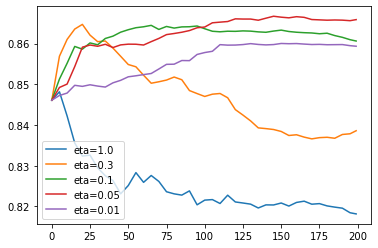

In [849]:
etas = ['eta=1.0', 'eta=0.3', 'eta=0.1', 'eta=0.05', 'eta=0.01'] # the etas I used. future ref.
for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)

plt.legend()

From the above we can see that the best **learning rate is 0.1** and it peaks at **65th** iteration before it starts to degrade.

In [850]:
scores['eta=0.1']

,num_iter,train_auc,val_auc
0,0,0.86270,0.84610
1,5,0.87730,0.85129
2,10,0.88444,0.85516
3,15,0.89435,0.85931
4,20,0.90348,0.85864
5,25,0.91147,0.86017
6,30,0.91847,0.85972
7,35,0.92233,0.86127
8,40,0.92568,0.86184
9,45,0.92911,0.86281


We tune the next parameter, **max_depth**

In [889]:
scores = {}

In [894]:
%%capture output

# eta is now 0.1
# max_depth_used while training = [3,4,6]
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [895]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=6'

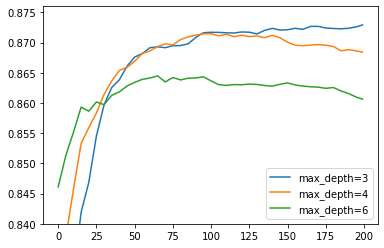

In [896]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

plt.ylim(0.84, 0.876)
plt.legend()

we can see that the best **max_depth** for this model is **4** at the **100th** iteration

In [897]:
scores['max_depth=4']

,num_iter,train_auc,val_auc
0,0,0.81943,0.81957
1,5,0.84199,0.83773
2,10,0.85408,0.84572
3,15,0.86354,0.85327
4,20,0.87043,0.85591
5,25,0.87497,0.85834
6,30,0.87862,0.86143
7,35,0.88124,0.86364
8,40,0.88466,0.86539
9,45,0.88707,0.86591


In [898]:
scores = {}

In [907]:
%%capture output

# eta is now 0.1
# min_child_weight = [1,10,20,30]
xgb_params = {
    'eta': 0.1, 
    'max_depth': 4,
    'min_child_weight': 10,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [908]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=10'

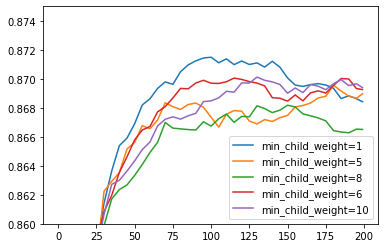

In [909]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)

plt.ylim(0.860, 0.8750)
plt.legend()

The best **min_child_weight is 1** which is the default

In [910]:
scores['min_child_weight=1']

,num_iter,train_auc,val_auc
0,0,0.81943,0.81957
1,5,0.84199,0.83773
2,10,0.85408,0.84572
3,15,0.86354,0.85327
4,20,0.87043,0.85591
5,25,0.87497,0.85834
6,30,0.87862,0.86143
7,35,0.88124,0.86364
8,40,0.88466,0.86539
9,45,0.88707,0.86591


In [911]:
# the best model after tuning is
xgb_params = {
    'eta': 0.1, 
    'max_depth': 4,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100)

### selecting the best model

In [912]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=10)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=10)

In [913]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8508637724013918

In [914]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=10,
                            min_samples_leaf=1,
                            random_state=43)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=43)

In [915]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.858858170396398

In [916]:
# the best model after tuning is
xgb_params = {
    'eta': 0.1, 
    'max_depth': 4,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100)

In [917]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.8715032306662985

In [918]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

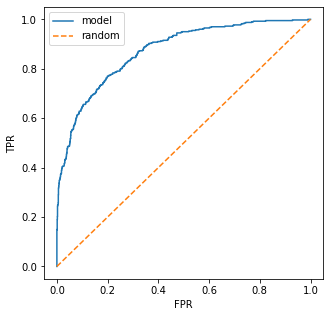

In [919]:
plt.figure(figsize=(5,5))

plt.plot(fpr, tpr, label='model')
plt.plot([0,1], [0,1], label='random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

From the above, we can that the xgBoost model is a little bit better than the other models 

so now, let's test it on the test set

In [920]:
df_full_train = df_full_train.reset_index(drop=True)

In [921]:
df_full_train

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,796,france,male,30,2,137262.71,2,yes,no,62905.29,0
1,748,spain,male,36,4,141573.55,1,yes,no,82158.14,0
2,845,spain,female,38,2,112803.92,1,yes,no,179631.85,0
3,585,spain,female,33,8,0.00,2,yes,no,114182.07,0
4,768,france,female,40,8,0.00,2,no,yes,69080.46,0
...,...,...,...,...,...,...,...,...,...,...,...
7995,498,germany,male,35,2,121968.11,2,no,yes,188343.05,0
7996,765,france,male,44,6,0.00,2,yes,yes,159899.97,0
7997,696,germany,female,27,2,96129.32,2,yes,yes,5983.70,0
7998,714,spain,male,45,0,124693.48,1,no,yes,187194.15,0


In [922]:
y_full_train = df_full_train.exited

In [923]:
y_full_train

0       0
1       0
2       0
3       0
4       0
       ..
7995    0
7996    0
7997    0
7998    0
7999    0
Name: exited, Length: 8000, dtype: int64

In [924]:
del df_full_train['exited']

In [925]:
dicts_full_train = df_full_train.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [926]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
                    feature_names=dv.get_feature_names_out())

dtest = xgb.DMatrix(X_test, feature_names=dv.get_feature_names_out())

In [927]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 4,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100)

In [928]:
y_pred = model.predict(dtest)

In [929]:
roc_auc_score(y_test, y_pred)

0.857551936856521

In [930]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

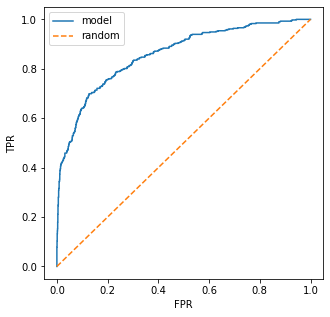

In [931]:
plt.figure(figsize=(5,5))

plt.plot(fpr, tpr, label='model')
plt.plot([0,1], [0,1], label='random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

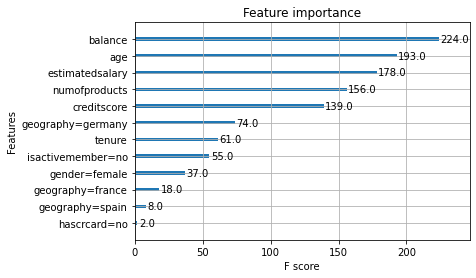

In [932]:
xgb.plot_importance(model)

We can see what features turned out to be important after building the final model

### Using the model

In [933]:
selected_user = 150
customer = test_dict[selected_user]
customer

{'geography': 'france',
 'gender': 'female',
 'hascrcard': 'yes',
 'isactivemember': 'no',
 'creditscore': 562,
 'age': 57,
 'tenure': 3,
 'balance': 0.0,
 'numofproducts': 3,
 'estimatedsalary': 6554.97}

In [934]:
y_test[selected_user]

1

In [935]:
X_one_person = dv.transform([customer])

In [936]:
dtest = xgb.DMatrix(X_one_person, feature_names=dv.get_feature_names_out())

In [937]:
exited_prob = model.predict(dtest)[0]
exited_prob

0.9664814

In [938]:
customer_will_exit_bank = exited_prob >= 0.5

In [939]:
customer_will_exit_bank.astype(int)

1

In [940]:
if customer_will_exit_bank == 0:
    print('Customer will NOT exit bank!')
else:
    print('Customer WILL exit the bank')

Customer WILL exit the bank


In [956]:
# test for a range for users
def get_predictions(from_i, to_i):
    if(from_i > to_i):
        print('first argument must be greater then the first')
        return
    for i in range(from_i, to_i + 1):
        print("================================")
        
        customer = test_dict[i]
        X_one_person = dv.transform([customer])
        
        dtest = xgb.DMatrix(X_one_person, feature_names=dv.get_feature_names_out())
        payment_prob = model.predict(dtest)[0]
        customer_will_default = payment_prob >= 0.5
        
        if customer_will_default == 0:
            print('Predicted: Customer {} will NOT exit bank!'.format(i))
        else:
            print('Predicted: Customer {} will NOT exit bank!'.format(i))
        
        if y_test[i] == 0:
            print('The truth is: Customer {} will NOT exit bank!'.format(i))
        else:
            print('The truth is: Customer {} will exit bank!!'.format(i))


In [958]:
get_predictions(40, 50)

Predicted: Customer 40 will NOT exit bank!
The truth is: Customer 40 will NOT exit bank!
Predicted: Customer 41 will NOT exit bank!
The truth is: Customer 41 will NOT exit bank!
Predicted: Customer 42 will NOT exit bank!
The truth is: Customer 42 will NOT exit bank!
Predicted: Customer 43 will NOT exit bank!
The truth is: Customer 43 will NOT exit bank!
Predicted: Customer 44 will NOT exit bank!
The truth is: Customer 44 will exit bank!!
Predicted: Customer 45 will NOT exit bank!
The truth is: Customer 45 will NOT exit bank!
Predicted: Customer 46 will NOT exit bank!
The truth is: Customer 46 will NOT exit bank!
Predicted: Customer 47 will NOT exit bank!
The truth is: Customer 47 will NOT exit bank!
Predicted: Customer 48 will NOT exit bank!
The truth is: Customer 48 will NOT exit bank!
Predicted: Customer 49 will NOT exit bank!
The truth is: Customer 49 will NOT exit bank!
Predicted: Customer 50 will NOT exit bank!
The truth is: Customer 50 will exit bank!!


### save the model

In [943]:
import pickle

In [944]:
output_file = 'model_v0.bin'
output_file

'model_v0.bin'

In [945]:
with open(output_file, 'wb') as f_out:
    pickle.dump((dv, model), f_out)

In [946]:
model_file = 'model_v0.bin'

In [947]:
with open(model_file, 'rb') as f_in:
    dv, model = pickle.load(f_in)

In [948]:
dv, model

(DictVectorizer(sparse=False), <xgboost.core.Booster at 0x2b69019e488>)

In [959]:
selected_user = 150
customer = test_dict[selected_user]
customer

{'geography': 'france',
 'gender': 'female',
 'hascrcard': 'yes',
 'isactivemember': 'no',
 'creditscore': 562,
 'age': 57,
 'tenure': 3,
 'balance': 0.0,
 'numofproducts': 3,
 'estimatedsalary': 6554.97}

In [960]:
X= dv.transform([customer])

In [961]:
dtest = xgb.DMatrix(X, feature_names=dv.get_feature_names_out())

In [962]:
model.predict(dtest)[0]

0.9664814